# Introduction
Tubular reactors are pipes, positioned either horizontally or vertically, through which fluids flow at a steady state. The reactants enter from one end, typically the left, and the products exit from the other end, usually the right. The most common type of tubular reactor is the Plug Flow Reactor (PFR), characterized by a uniform flow in the axial direction and consistent properties across the radial direction.

Variable Molar Gas-Phase Reactions (VARMOL) are gas-phase reactions where the molar quantity of reactants and products changes, leading to fluctuations in volume and volumetric flow rate. These changes are influenced by temperature and pressure. This report focuses on modeling a tubular reactor with variable molar flow, using parameters and a problem statement from a coursebook. The modeled reaction is A → mB, with a rate constant k. The model utilizes the Ideal Gas Law to determine volumetric flow rate from molar flow at different reactor points. Steady-state mole balance, under constant temperature and pressure, yields equations for the model.

# Objectives
The modeling aims to:

- Examine how changing the stoichiometry (m) affects the reaction.
- Demonstrate that the volumetric flow rate (G) remains relatively stable along the reactor length when a large amount of inert gas is present.
- Achieve a linear temperature profile within the system.
- Achieve a linear pressure profile while considering pressure drop throughout the reactor.

# Methodology
The modeling process involved several steps:

- Essential libraries like NumPy, Matplotlib, and SciPy were imported for numerical operations, visualization, and integration.
- Initial gas conditions (pressure, temperature) and molar flow rates were defined based on the textbook. Algebraic equations were used to determine initial values for the ODEs.
- A function model_f was created to represent the model, taking mole fraction of A (ya) and reactor length (Z) as inputs, and returning the two differential equations.
- The reactor length was defined, and an array Z was created to represent points along the reactor. An array initial was created for initial values, and the ODEs were solved using odeint from SciPy, storing the solutions in sol.
- Molar flow rates, volumetric flow rates, mole fractions, and conversion were calculated from the ODE solutions.
- The changes in molar fractions, conversion, and volumetric flow rate along the reactor length were plotted using Matplotlib.
- The influence of stoichiometry (m) on volumetric flow rate (G) was investigated by varying m and plotting G for different values.
- The effect of initial inert molar flow rate (Ni0) on G was examined similarly, by varying Ni0 and plotting G.
- A linear temperature profile was incorporated by creating a new function model_new with an additional ODE for temperature change.
- The reaction rate constant was adjusted for temperature, and plots of G vs. Z and Xa vs. Z were generated for different temperatures.
- A linear pressure profile with pressure drop was modeled by adding an ODE for pressure change (Ergun equation) to model_new. Plots of G vs. Z and P vs. Z were created for different initial pressures.
- The change in molar fraction of A (yA) and G with varying Ni0 was analyzed by creating arrays to store values and plotting yA and G against Ninert.

## Results and Discussion
In the following section, we present the results obtained from our simulations and discuss their significance. These findings will provide insights into the behavior of the modeled systems and inform subsequent analyses.

## Problem 1:
Vary the stoichiometry to see the influence of m. Note that if m=l, G
must be constant through the reactor. 

In [94]:
# importing the necessary libraries for equations solving and visualizing
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as pl


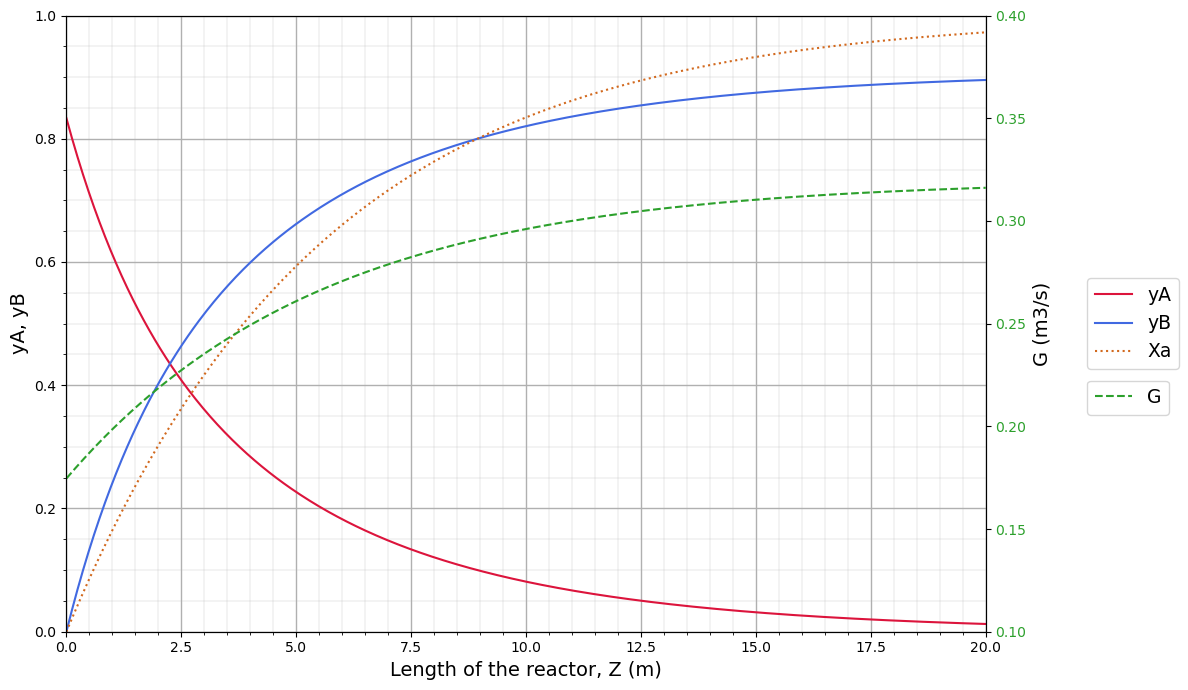

In [95]:
# initial parameter values
R = 8.3144 # gas constant, (J/mol.K)
T = 350 # Reaction temperature, (K)
P = 1.e5 # Pressure in PFR, (N/m^2)
k = 15 # Reaction rate constant, (1/s)
m = 2 # stoichiometric constant

Na0 = 5 # initial molar concentration of component A, (mol/s)
Nb0 = 0 # initial molar concentration of component B, (mol/s)
Ni0 = 1 # initial molar concentration of inert I, (mol/s)
A = 0.012 # cross-sectional area, (m^2)


# formulas to calculate initial value of ODEs
NT0 = Na0 + Nb0 + Ni0
G0 = (NT0 * R * T) / P # initial volumetric flow rate
ya0 = Na0 / NT0 # mole fraction of component A
yb0 = Nb0 / NT0 # mole fraction of component B
yi0 = Ni0 / NT0 # mole fraction of inert I
yaG = ya0 * G0
ybG = yb0 * G0
# number of intervals and final length of the reactor
cint = 500
Zfinal = 20

# function created to feed into ode solver that returns the intergrated value of the ODEs
def model_f(x, Z):
    ya = x[0]
    # ODEs to be solved
    dyaGdZ = - k * ya * A
    dybGdz = m * k * ya * A
    #returns the integrated value when used in ode solver at given 'Z'
    return [dyaGdZ, dybGdz]

#equal spaced length intervals created to use while plotting the intergrated data
Z = np.linspace(0, Zfinal, cint)

#initial value array
initial = [yaG, ybG]
sol = odeint(model_f, initial, Z)

# addition equations to find the value of required G
Na = (sol[:,0] * P) / (R * T)
Nb = (sol[:,1] * P) / (R * T)
G = ((Na + Nb + Ni0) * R * T) / P
yA = sol[:,0] / G
yB = sol[:,1] / G
yI = Ni0 / G
Xa = (Na0 - Na) / Na0

# creating a subplot to fit two y-axis and increasing the output figure size
fig, plt = pl.subplots(figsize=(12,7))

#codes to plot the time and integrated values
plt.plot(Z, yA, color = "crimson", label = "yA")
plt.plot(Z, yB, color = "royalblue", label = "yB")
plt.plot(Z, Xa, color = "chocolate", label = "Xa", ls=":")

# plot description
plt.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.1,0.5))
plt.set_xlim(0,Zfinal)
plt.set_ylim(0,1)
plt.set_xlabel("Length of the reactor, Z (m)", fontsize=14)
plt.set_ylabel("yA, yB", fontsize=14)

# subplot with the same x-axis as the above one
ax = plt.twinx()
color = "tab:green"
# plotting the G vs Z graph in the above graph
ax.plot(Z, G, color = color, linestyle = "--", label = "G")

# to make the line color same as y-axis data color
ax.tick_params(axis='y', labelcolor=color)
ax.set_ylim(0.1,0.4)
ax.set_ylabel("G (m3/s)", fontsize=14)
ax.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.1,0.38))

# plot description
plt.grid(which='minor', linewidth=0.2)
plt.grid(which='major', linewidth=1)
plt.minorticks_on()
pl.tight_layout()
pl.show()

The change in the values of molar fraction of A as well as B, conversion of component A and the
total volumetric flow rate, G along the reactor length can be seen. The mole fraction of
A (red curve) can be seen decreasing while the mol fraction of B (blue curve) can be seen
increasing. This is due to the fact that reactant A is disappearing and converting to B which is
evident from the graph of increasing Xa (dotted orange curve). Since the final value of yA is not
equal to zero, we can see that the conversion Xa doesn’t reach to value 1. The green dashed
curve shows the total volumetric flow rate G which is increasing. This is because the
stochiometric value of m is 2, so, the reaction increases the flow rate.

### Problem :
Vary the stoichiometry to see the influence of m. Note that if m=1, G must be constant through the reactor.

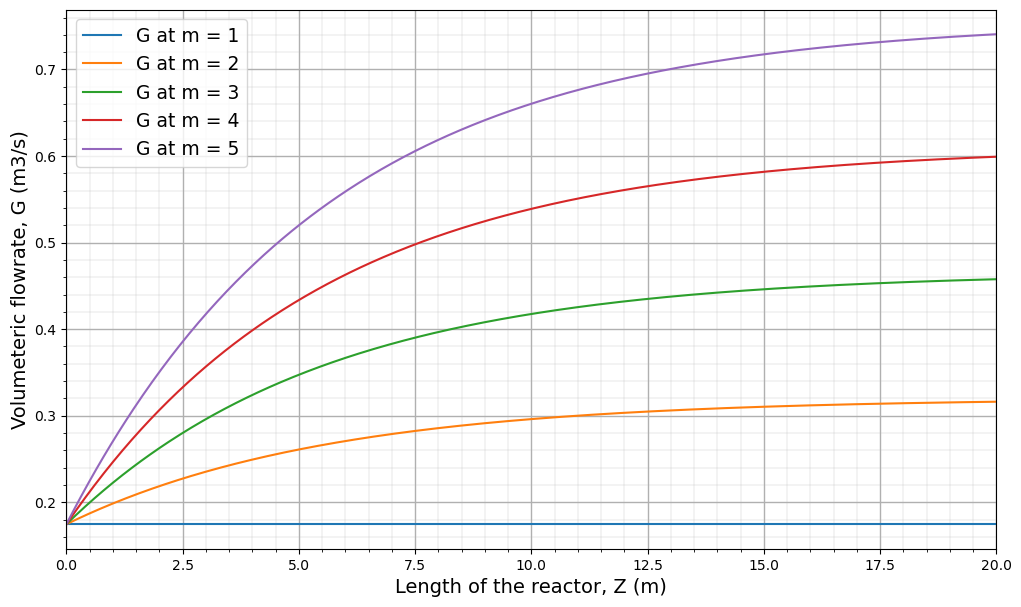

In [96]:
# various values of m to see the influence in G
mchange = [1, 2, 3, 4, 5]
# increases the output plot size
fig = pl.figure(figsize=(12,7))
# loop to plot the in a same graph of various G values with changing m values
for i in range(5):
    m = mchange[i]
    sol = odeint(model_f, initial, Z)
    Na = (sol[:,0] * P) / (R * T)
    Nb = (sol[:,1] * P) / (R * T)
    G = ((Na + Nb + Ni0) * R * T) / P
    pl.plot(Z, G, label = "G at m = {}".format(m))
    pl.grid(which='minor', linewidth=0.2)
    pl.grid(which='major', linewidth=1)
    pl.minorticks_on()
    pl.legend(fontsize=13.5)
    pl.xlim(0, Zfinal)
pl.ylabel("Volumeteric flowrate, G (m3/s)", fontsize=14)
pl.xlabel("Length of the reactor, Z (m)", fontsize=14)
pl.show()

The volumetric flow rate G is proportional to ‘m’ because G = G0 * (1+εXa) where ε = m - 1. So
increasing the value of ‘m’ increases the flow rate correspondingly which can be observed . As stated in the problem, when the value of ‘m’ = 1, there is no change in G throughout the
reactor which is shown by the blue line.

### Problem :
Set the molar feed rate of inerts to a high value, and note that G does not
change much with position. 

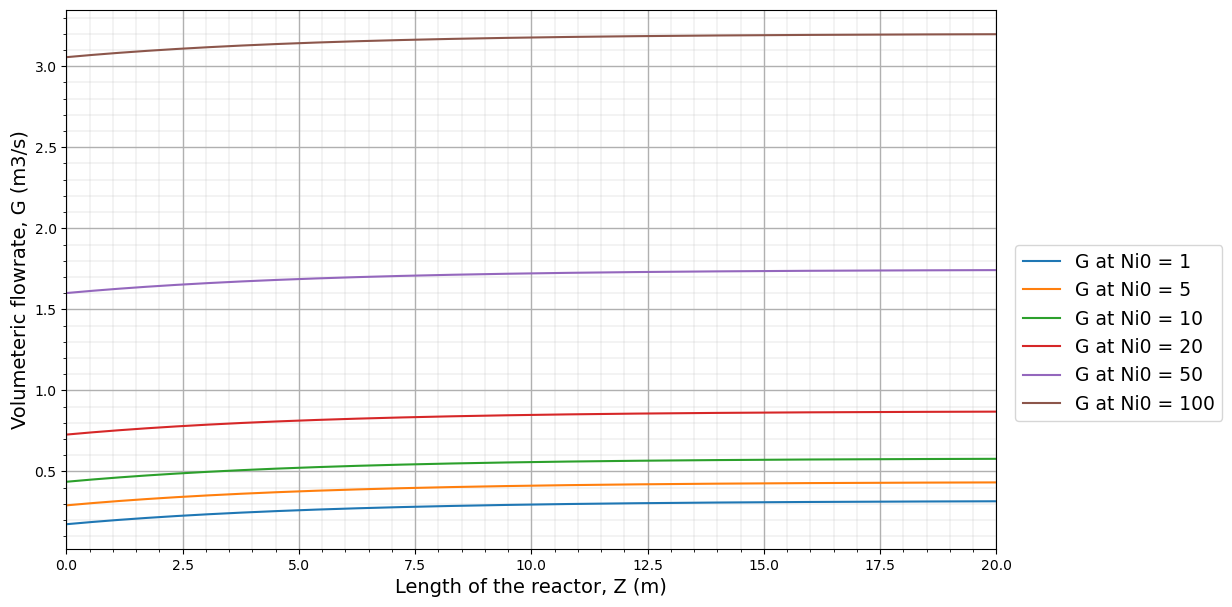

In [97]:
m = 2
Ni_change = np.array([1, 5, 10, 20, 50, 100])
fig = pl.figure(figsize=(12,7))
for i in range(Ni_change.shape[0]):
    Ni0 = Ni_change[i]
    sol = odeint(model_f, initial, Z)
    Na = (sol[:,0] * P) / (R * T)
    Nb = (sol[:,1] * P) / (R * T)
    G = ((Na + Nb + Ni0) * R * T) / P
    pl.plot(Z, G, label = "G at Ni0 = {}".format(Ni0))
    pl.grid(which='minor', linewidth=0.2)
    pl.grid(which='major', linewidth=1)
    pl.minorticks_on()
    pl.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.01,0.4))
    pl.xlim(0, Zfinal)
pl.ylabel("Volumeteric flowrate, G (m3/s)", fontsize=14)
pl.xlabel("Length of the reactor, Z (m)", fontsize=14)
pl.show()

The variation in the value of G was observed when setting the initial inert molar flow to higher
values from 1 to 100 kmol/s. The observed variation was plotted and shown. From the
graph, it shows that the value of the G increases but there is no significant change in the slope of
the curve while changing Ni0 values. This is because when increasing the NI

, the value of G is
dominated by NI ie. NI >>> NA, NB. So, there is no significant change in the slope of G seen
along the length of the reactor.

### Problem :
Change the model and program to account for a linear temperature
profile. 

/var/folders/kg/cv57ptp54_l70rth7db9v5jh0000gn/T/ipykernel_8106/970163590.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  k1 = k * np.exp(5 * ((1 / T0) - (1/ T)))


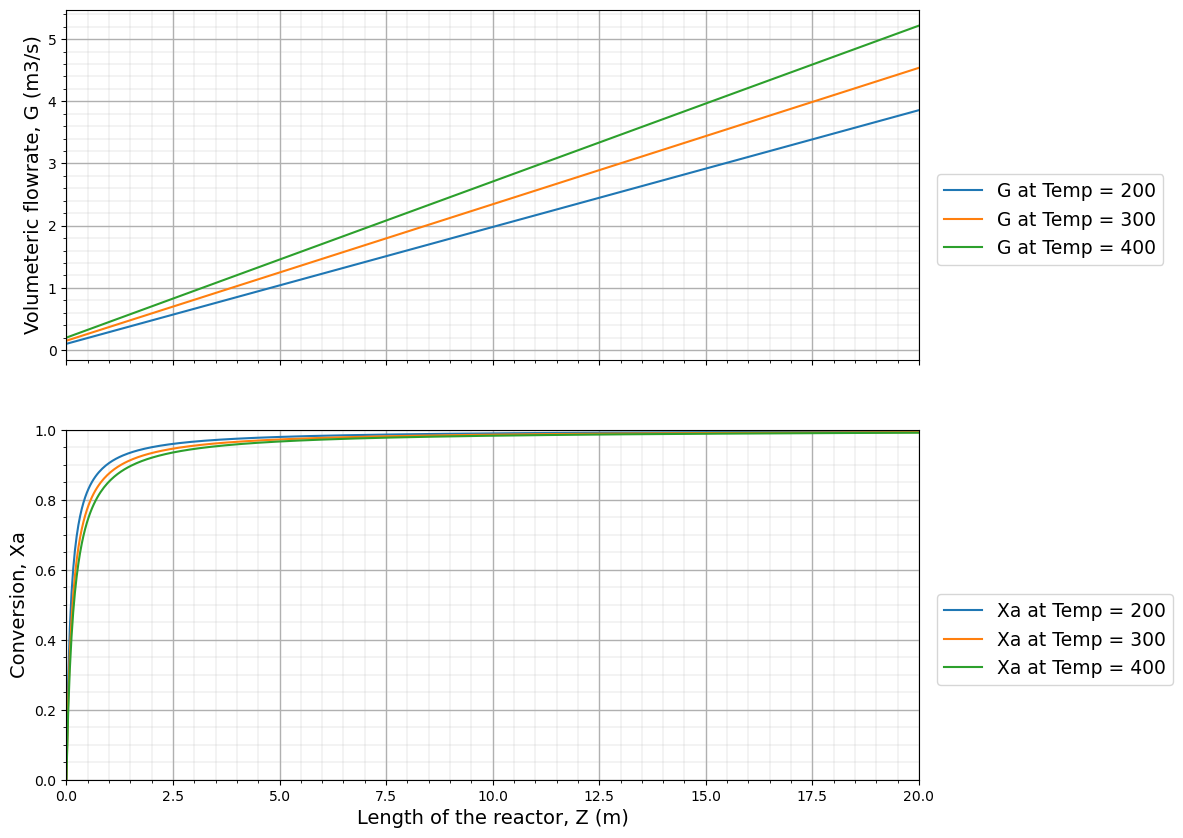

In [98]:
Ni0 = 1
m = 2
T_change = np.array([200, 300, 400])
cint = 500
Zfinal = 20
def model_new(x, Z):
    ya0 = x[0]
    T = x[1]
    k1 = k * np.exp(5 * ((1 / T0) - (1/ T)))
    dyaGdZ = (- k1 * ya0 * A)
    dybGdZ = m * k * ya0 * A
    dTdZ = 1500 - 2 * (T - T0)
    return [dyaGdZ, dybGdZ, dTdZ]
Z = np.linspace(0, Zfinal, cint)

fig, (plt, ax) = pl.subplots(2, 1, sharex = True, figsize=(11,10))
for i in range(T_change.shape[0]):
    T0 = T_change[i]
    G0 = (NT0 * R * T0) / P # initial volumetric flow rate
    ya0 = Na0 / NT0 # mole fraction of component A
    yb0 = Nb0 / NT0 # mole fraction of component B
    yi0 = Ni0 / NT0 # mole fraction of inert I
    yaG = ya0 * G0
    ybG = yb0 * G0
    initial = [yaG, ybG, T0]
    sol = odeint(model_new, initial, Z)
    Na = (sol[:,0] * P) / (R * sol[:,2])
    Nb = (sol[:,1] * P) / (R * sol[:,2])
    G = ((Na + Nb + Ni0) * R * sol[:,2]) / P
    Xa = (Na0 - Na) / Na0
    plt.plot(Z, G, label = "G at Temp = {}".format(T_change[i]))
    plt.grid(which='minor', linewidth=0.2)
    plt.grid(which='major', linewidth=1)
    plt.minorticks_on()
    plt.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.01,0.4))
    plt.set_xlim(0, Zfinal)
    plt.set_ylabel("Volumeteric flowrate, G (m3/s)", fontsize=14)
    ax.plot(Z, Xa, label = "Xa at Temp = {}".format(T_change[i]))
    ax.grid(which='minor', linewidth=0.2)
    ax.grid(which='major', linewidth=1)
    ax.minorticks_on()
    ax.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.01,0.4))
    ax.set_xlim(0, Zfinal)
    ax.set_ylim(0, 1)

ax.set_ylabel("Conversion, Xa", fontsize=14)
ax.set_xlabel("Length of the reactor, Z (m)", fontsize=14)
pl.show()

### Problem :
Change the model and program to account for a linear pressure profile,
allowing for pressure drop through the reactor. 

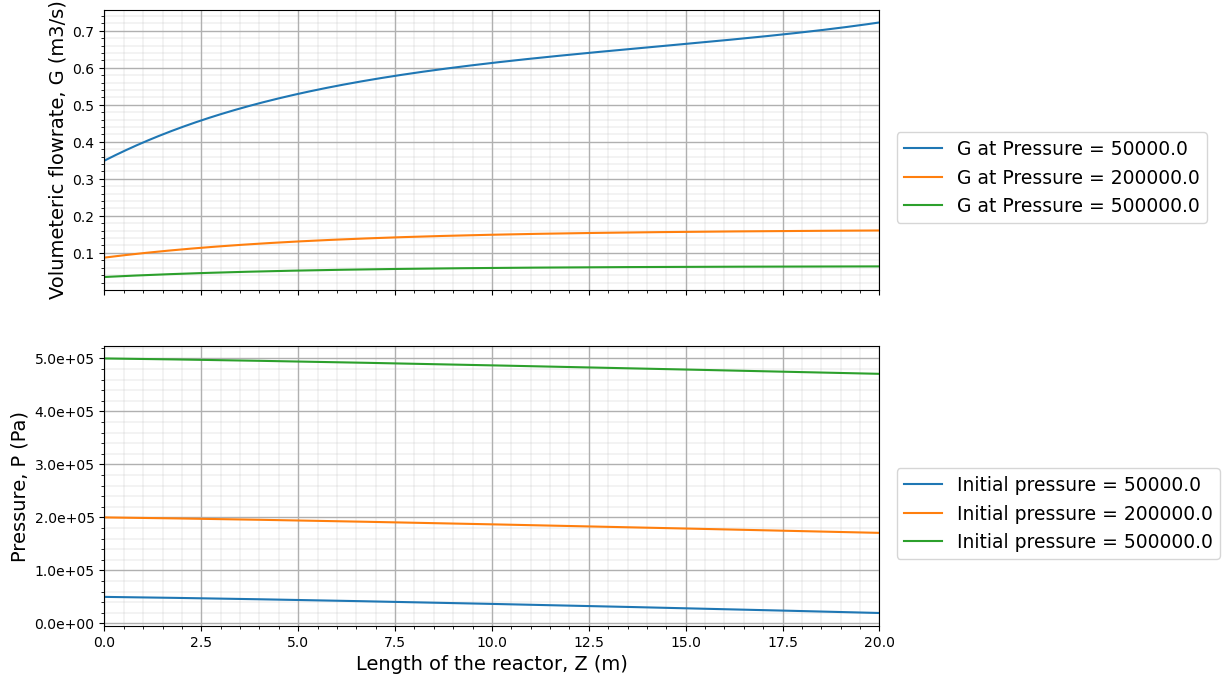

In [99]:
import matplotlib.ticker as mtick
Ni0 = 1
m = 2
T0 = 350
P0 = 1e5
P_change = np.array([0.5e5, 2e5, 5e5])
beta = 900
cint = 500
Zfinal = 20
Z = np.linspace(0, Zfinal, cint)
fig, (plt, ax) = pl.subplots(2, 1, sharex = True, figsize=(10,8))
for i in range(P_change.shape[0]):
    P0 = P_change[i]
    G0 = (NT0 * R * T0) / P0
    ya0 = Na0 / NT0
    yb0 = Nb0 / NT0
    yi0 = Ni0 / NT0
    yaG = ya0 * G0
    ybG = yb0 * G0
    initial = [yaG, ybG, P0]
    def model_new(x, Z):
        ya0 = x[0]
        yb0 = x[1]
        P = x[2]
        Na = (ya0 * P) / (R * T0)
        Nb = (yb0 * P) / (R * T0)
        NT = Na + Nb + Ni0
        dyaGdZ = (- k * ya0 * A)
        dybGdZ = m * k * ya0 * A
        dpdZ = -beta * (P0 / P) * (NT / NT0)
        return [dyaGdZ, dybGdZ, dpdZ]
    
    sol = odeint(model_new, initial, Z)
    Na = (sol[:,0] * sol[:,2]) / (R * T0)
    Nb = (sol[:,1] * sol[:,2]) / (R * T0)
    NT = Na + Nb + Ni0
    G = (NT * R * T0) / sol[:,2]
    Xa = (Na0 - Na) / Na0
    
    plt.plot(Z, G, label = "G at Pressure = {}".format(P_change[i]))
    plt.grid(which='minor', linewidth=0.2)
    plt.grid(which='major', linewidth=1)
    plt.minorticks_on()
    plt.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.01,0.4))
    plt.set_xlim(0, Zfinal)
    plt.set_ylabel("Volumeteric flowrate, G (m3/s)", fontsize=14)
    
    ax.plot(Z, sol[:,2], label = "Initial pressure = {}".format(P_change[i]))
    ax.grid(which='minor', linewidth=0.2)
    ax.grid(which='major', linewidth=1)
    ax.minorticks_on()
    ax.legend(fontsize=13.5, loc = "center left", bbox_to_anchor=(1.01,0.4))
    ax.set_xlim(0, Zfinal)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax.set_ylabel("Pressure, P (Pa)", fontsize=14)
ax.set_xlabel("Length of the reactor, Z (m)", fontsize=14)
pl.show()

We can deduce that the total volumetric flow rate G of the reactor increases as the
inlet feed pressure is decreased. This is expected as G is inversely proportional to the pressure P
which can be seen in equation 4. For smaller pressure value of 50,000 Pa, it shows that there is
significant change in volumetric flow G along the reactor position than at higher pressures of
200,000 and 500,000 Pa. We can also observe the pressure drop across
the reactor.

## Conclusion
The modeling study of a tubular reactor with variable molar flow led to the following conclusions:

- The volumetric flow rate (G) remained constant when the stoichiometry (m) was 1. The rate of change of G increased as m increased.
- Increasing the molar flow of inert gases did not significantly affect the change in G along the reactor length, only its initial and final values.
- The volumetric flow rate increased with temperature, while the conversion decreased, suggesting an exothermic reaction.
- There was a pressure drop across the reactor, and the volumetric flow rate decreased as the initial pressure increased.